In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats as st
import sklearn

import time

In [3]:
CSN_path = './'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP_1.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_prepared = pd.get_dummies(CSN)

CSN_prepared['Surface Area per Liter'] = CSN_prepared['Surface Area (NMC) (m2/g)'] * CSN_prepared['Concentration (mg/L)']
CSN_prepared = CSN_prepared.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_prepared['log Concentration'] = np.log10(CSN_prepared['Concentration (mg/L)'] + 1e-9)
CSN_prepared = CSN_prepared.drop(['Concentration (mg/L)'], axis=1)

In [4]:
CSN_path = './'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP_1.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

#CSN_new_err = CSN['Error'][-206:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

#tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

In [39]:
out3 = np.load('true_test_206.pkl', allow_pickle=True)
out4 = np.load('true_test_206_ELUReLU.pkl', allow_pickle=True)

0.00551478452926446
0.0584769701590581
0.06781535271368921
0.04370000512152909
0.05454648107236196
0.6224362802351073
0.1884659184659081
0.3045137597024994
0.32060873706638815
0.3112231141367555
0.10286646421426965
0.8400042172598838
0.514374923194702
0.5041174806892319
0.25714652635460655
0.057716573373020164
0.10909425355755614
0.10585828224076466
0.14168521766930386
0.18589729235287467
0.18724349387951666
0.08068002051392362
0.009657359350649819
0.0540304401350899
0.06490660494786071
0.19191211339979164
0.19927383382987973
0.19335973560810094
0.26385498517751704
0.09719394131058884
0.13960534837841987
0.19046621918678286
0.30655786539668284
0.27788323581218716
0.1902972036158485
0.19064292013645168
0.19487225872278213
0.21164342297667693
0.011321425810997043
0.06516363611817363
0.09168982374668116
0.12226865571737289
0.11122606194019313
0.21906373572349547
0.1732236419870301
0.08048311055135732
0.12417027141475678
0.17539764579219064
0.14672493445282753
0.2614032597934647
0.19430372

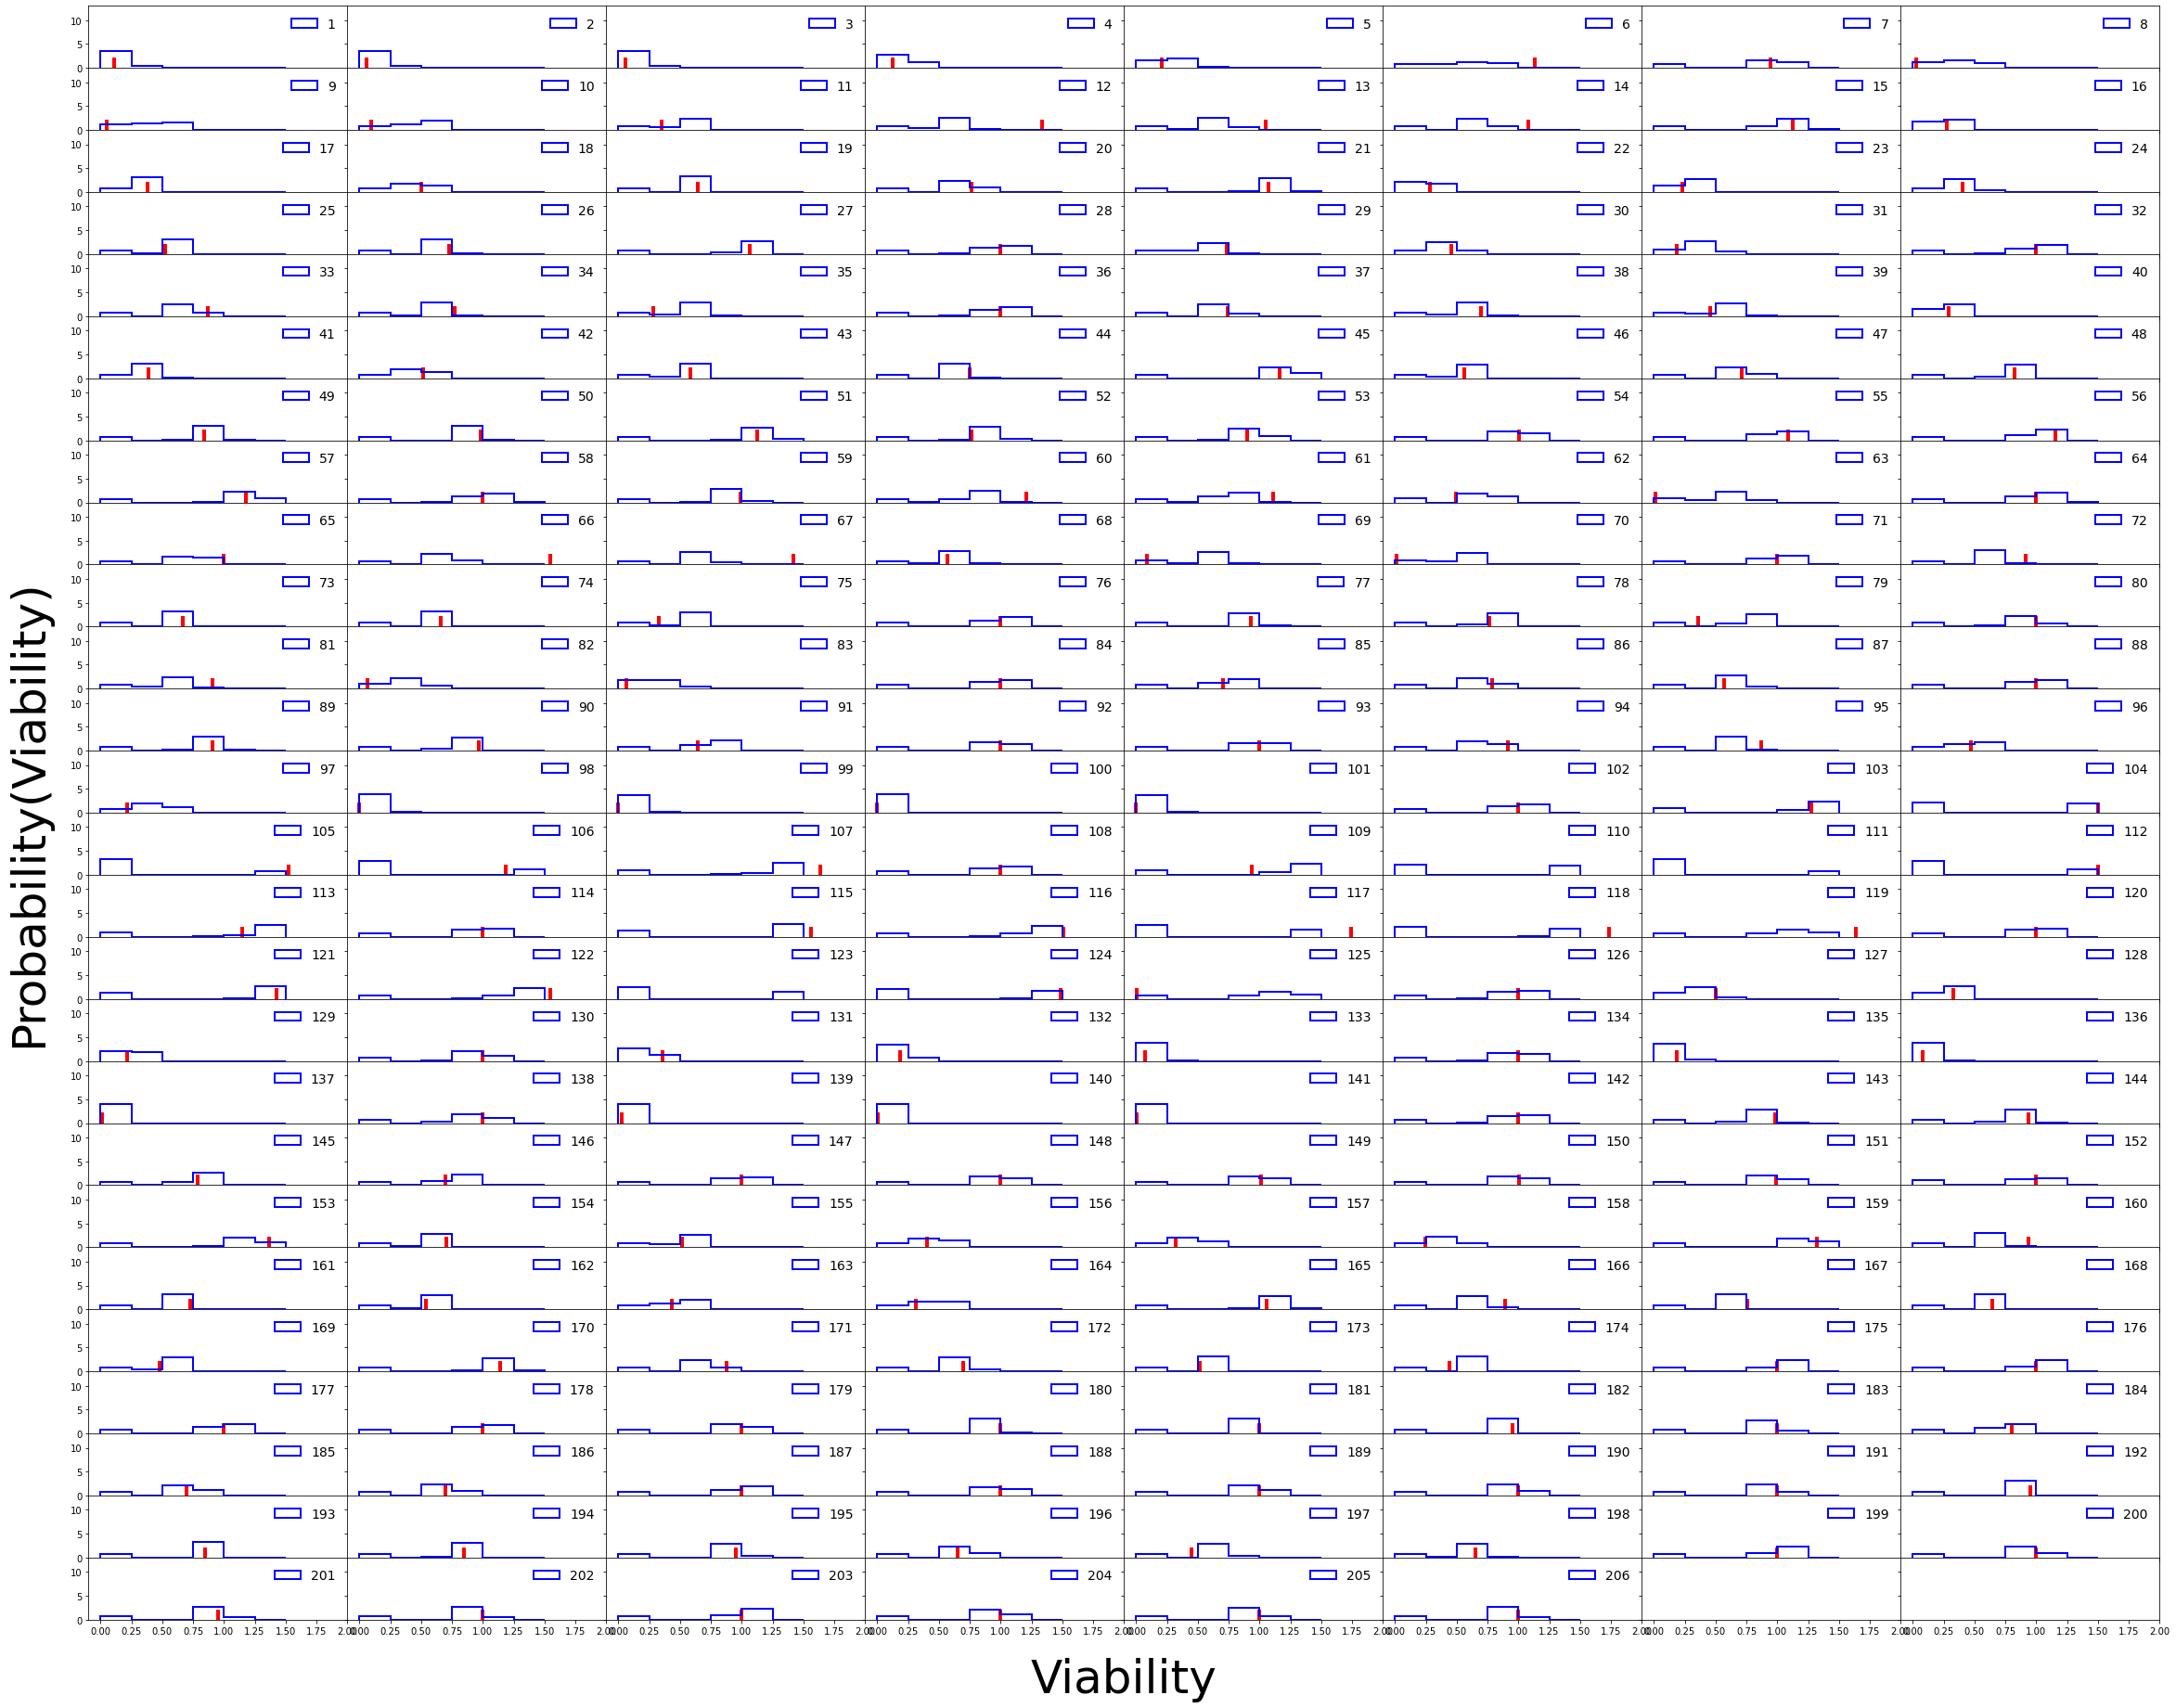

In [8]:
fig_new_dat, axes = plt.subplots(26, 8, figsize=(40, 32), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 7-fold bags for 206 data set - trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(206):
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    
    #print('test number:', i+1)
  
    M =np.mean(out3[:, 0, 0, i])
    Diff = abs(M-x2)
    print (Diff)
    
    #A = st.ttest_1samp(out3[:, 0, 0, i], x2)
    
    #print (A)
    
    #n, bins, patches = plt.hist(out[:, 0, 0, i], bins=20, range=(0, 1.5))
    
    #print(n)
    #print(bins)
    #print(patches)
    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    axes[i].set_ylim([0, 13])
    axes[i].set_xlim([-0.1, 2.0])
    axes[i].hist(out3[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    axes[i].legend(framealpha=0.0,fontsize=14)
#plt.show()
#plt.savefig('206_MARCC_100_1k.pdf', transparent=True, format='pdf', bbox_inches='tight')

0.007612008707792647
0.0637391761204352
0.07709642983326495
0.06671922798117265
0.09189158281337154
0.5948055928971153
0.05717004596551123
0.380987765382105
0.3927212732671144
0.3783362016881181
0.16428773403939612
0.7856132138845877
0.46826255668822925
0.4628379257359174
0.18357887549657337
0.029140196843078392
0.07854770406647155
0.058744781023309545
0.08130000740883858
0.1252356346786958
0.08746609239969838
0.04480599685102071
0.04318426911015477
0.0010985401591913635
0.005038509338943231
0.12143873996963883
0.09817005096010611
0.10476667273556961
0.2398231678261437
0.055183580337912874
0.1872888839196578
0.0889106397456797
0.2506935972901295
0.2112541699168553
0.261810901917134
0.10071145909012647
0.13831171864242164
0.14468619088337242
0.08167608196103732
0.026817902520713643
0.046442765304690714
0.07537119146070365
0.06813657237705284
0.18105489105515016
0.07947663065898558
0.014827186850648988
0.04194675385268065
0.0974354072599164
0.07281727139408523
0.1902300908959218
0.060800

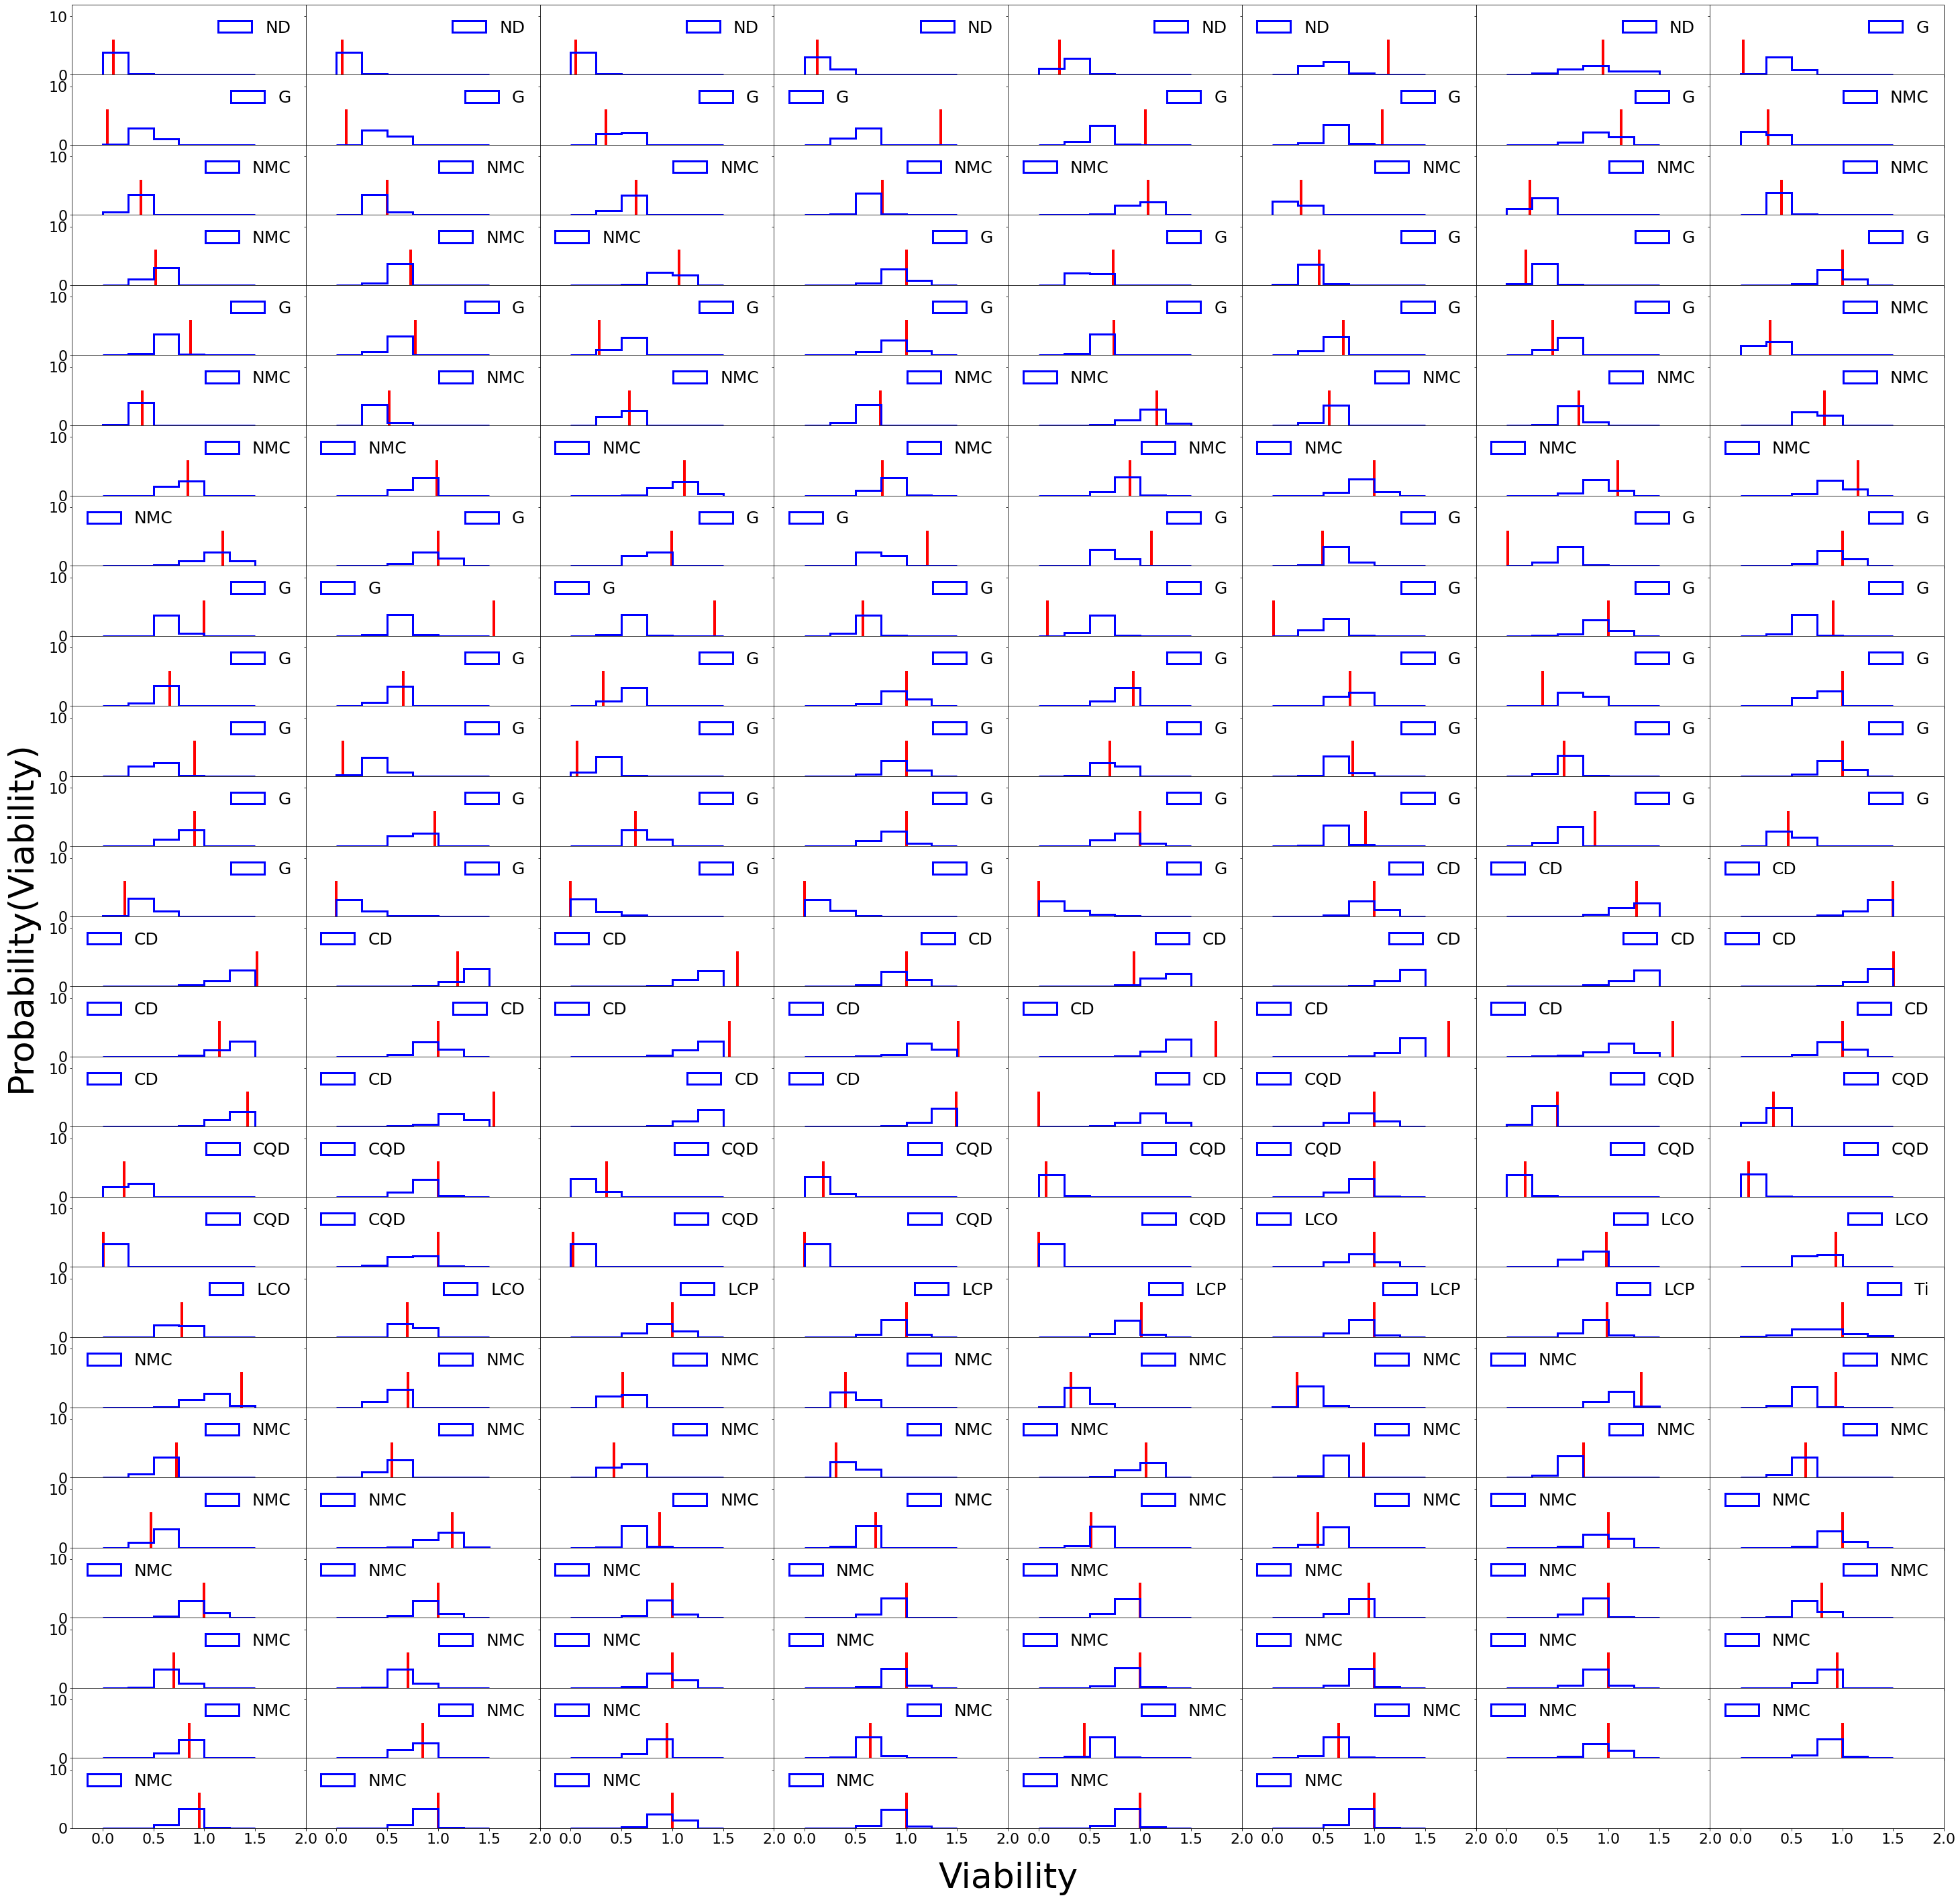

In [41]:

import matplotlib 
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

fig_new_dat, axes = plt.subplots(26, 8, figsize=(50, 50), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)



fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 7-fold bags for 206 data set - trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=52, labelpad=50)
plt.xlabel('Viability', fontsize=52, labelpad=50)
plt.yticks([])
plt.xticks([])

for i in np.arange(206):
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    
    #print('test number:', i+1)
  
    M =np.mean(out3[:, 1, 0, i])
    Diff = abs(M-x2)
    print (Diff)
    
    #A = st.ttest_1samp(out3[:, 0, 0, i], x2)
    
    #print (A)
    
    #n, bins, patches = plt.hist(out[:, 0, 0, i], bins=20, range=(0, 1.5))
    
    #print(n)
    #print(bins)
    #print(patches)
    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    
    HH=['ND', 'ND', 'ND', 'ND', 'ND', 'ND', 'ND', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 
        'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD','CD', 'CD', 'CD', 'CD', 'CD', 'CD', 
        'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CQD', 'CQD', 'CQD', 'CQD','CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'LCO', 'LCO', 'LCO', 'LCO', 'LCO', 'LCP', 'LCP', 'LCP', 'LCP', 'LCP', 'Ti', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC']
    
  
    axes[i].set_ylim([0, 12])
    axes[i].set_xlim([-0.3, 2.0])
    axes[i].hist(out3[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=HH[i], lw=3)
    
    axes[i].plot(np.ones(30)*x2, np.arange(0, 6, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    
    
    axes[i].legend(framealpha=0.0,fontsize=25)
#plt.show()
plt.savefig('206_MARCC_100_k=4.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [ ]:
###Same above but with ELU/ReLU 

0.08518300431886348
0.029461423152736407
0.018967398940521484
0.034763724735432225
0.027339820582388125
0.5652270118945484
0.12429430439222111
0.27382684526203627
0.33288309593623594
0.36889032523735166
0.20119742157719933
0.7081061719844027
0.3557239396247637
0.32214304219115086
0.05620194366501896
0.005756270793320473
0.03308289022358385
0.013159341450144857
0.030434685918100834
0.05321642371431856
0.007773063318885498
0.053354563941735766
0.0639811294977981
0.02224126804039739
0.031575839497739455
0.07366518979434666
0.004374684847165966
0.010023562428018828
0.15473198661033472
0.06114249167738289
0.14588380566347192
0.04601017263290175
0.20507615288638203
0.22253815938112465
0.22785950707979247
0.0722212604571627
0.10066660525221094
0.15632821185108048
0.05098088088399516
0.0036276892079834533
0.027160388459443796
0.04440384864454194
0.011955348806311994
0.08341065148266336
0.026002127776150186
0.02046125666755383
0.014559088865665593
0.0477576855535049
6.6680628092452565e-06
0.091

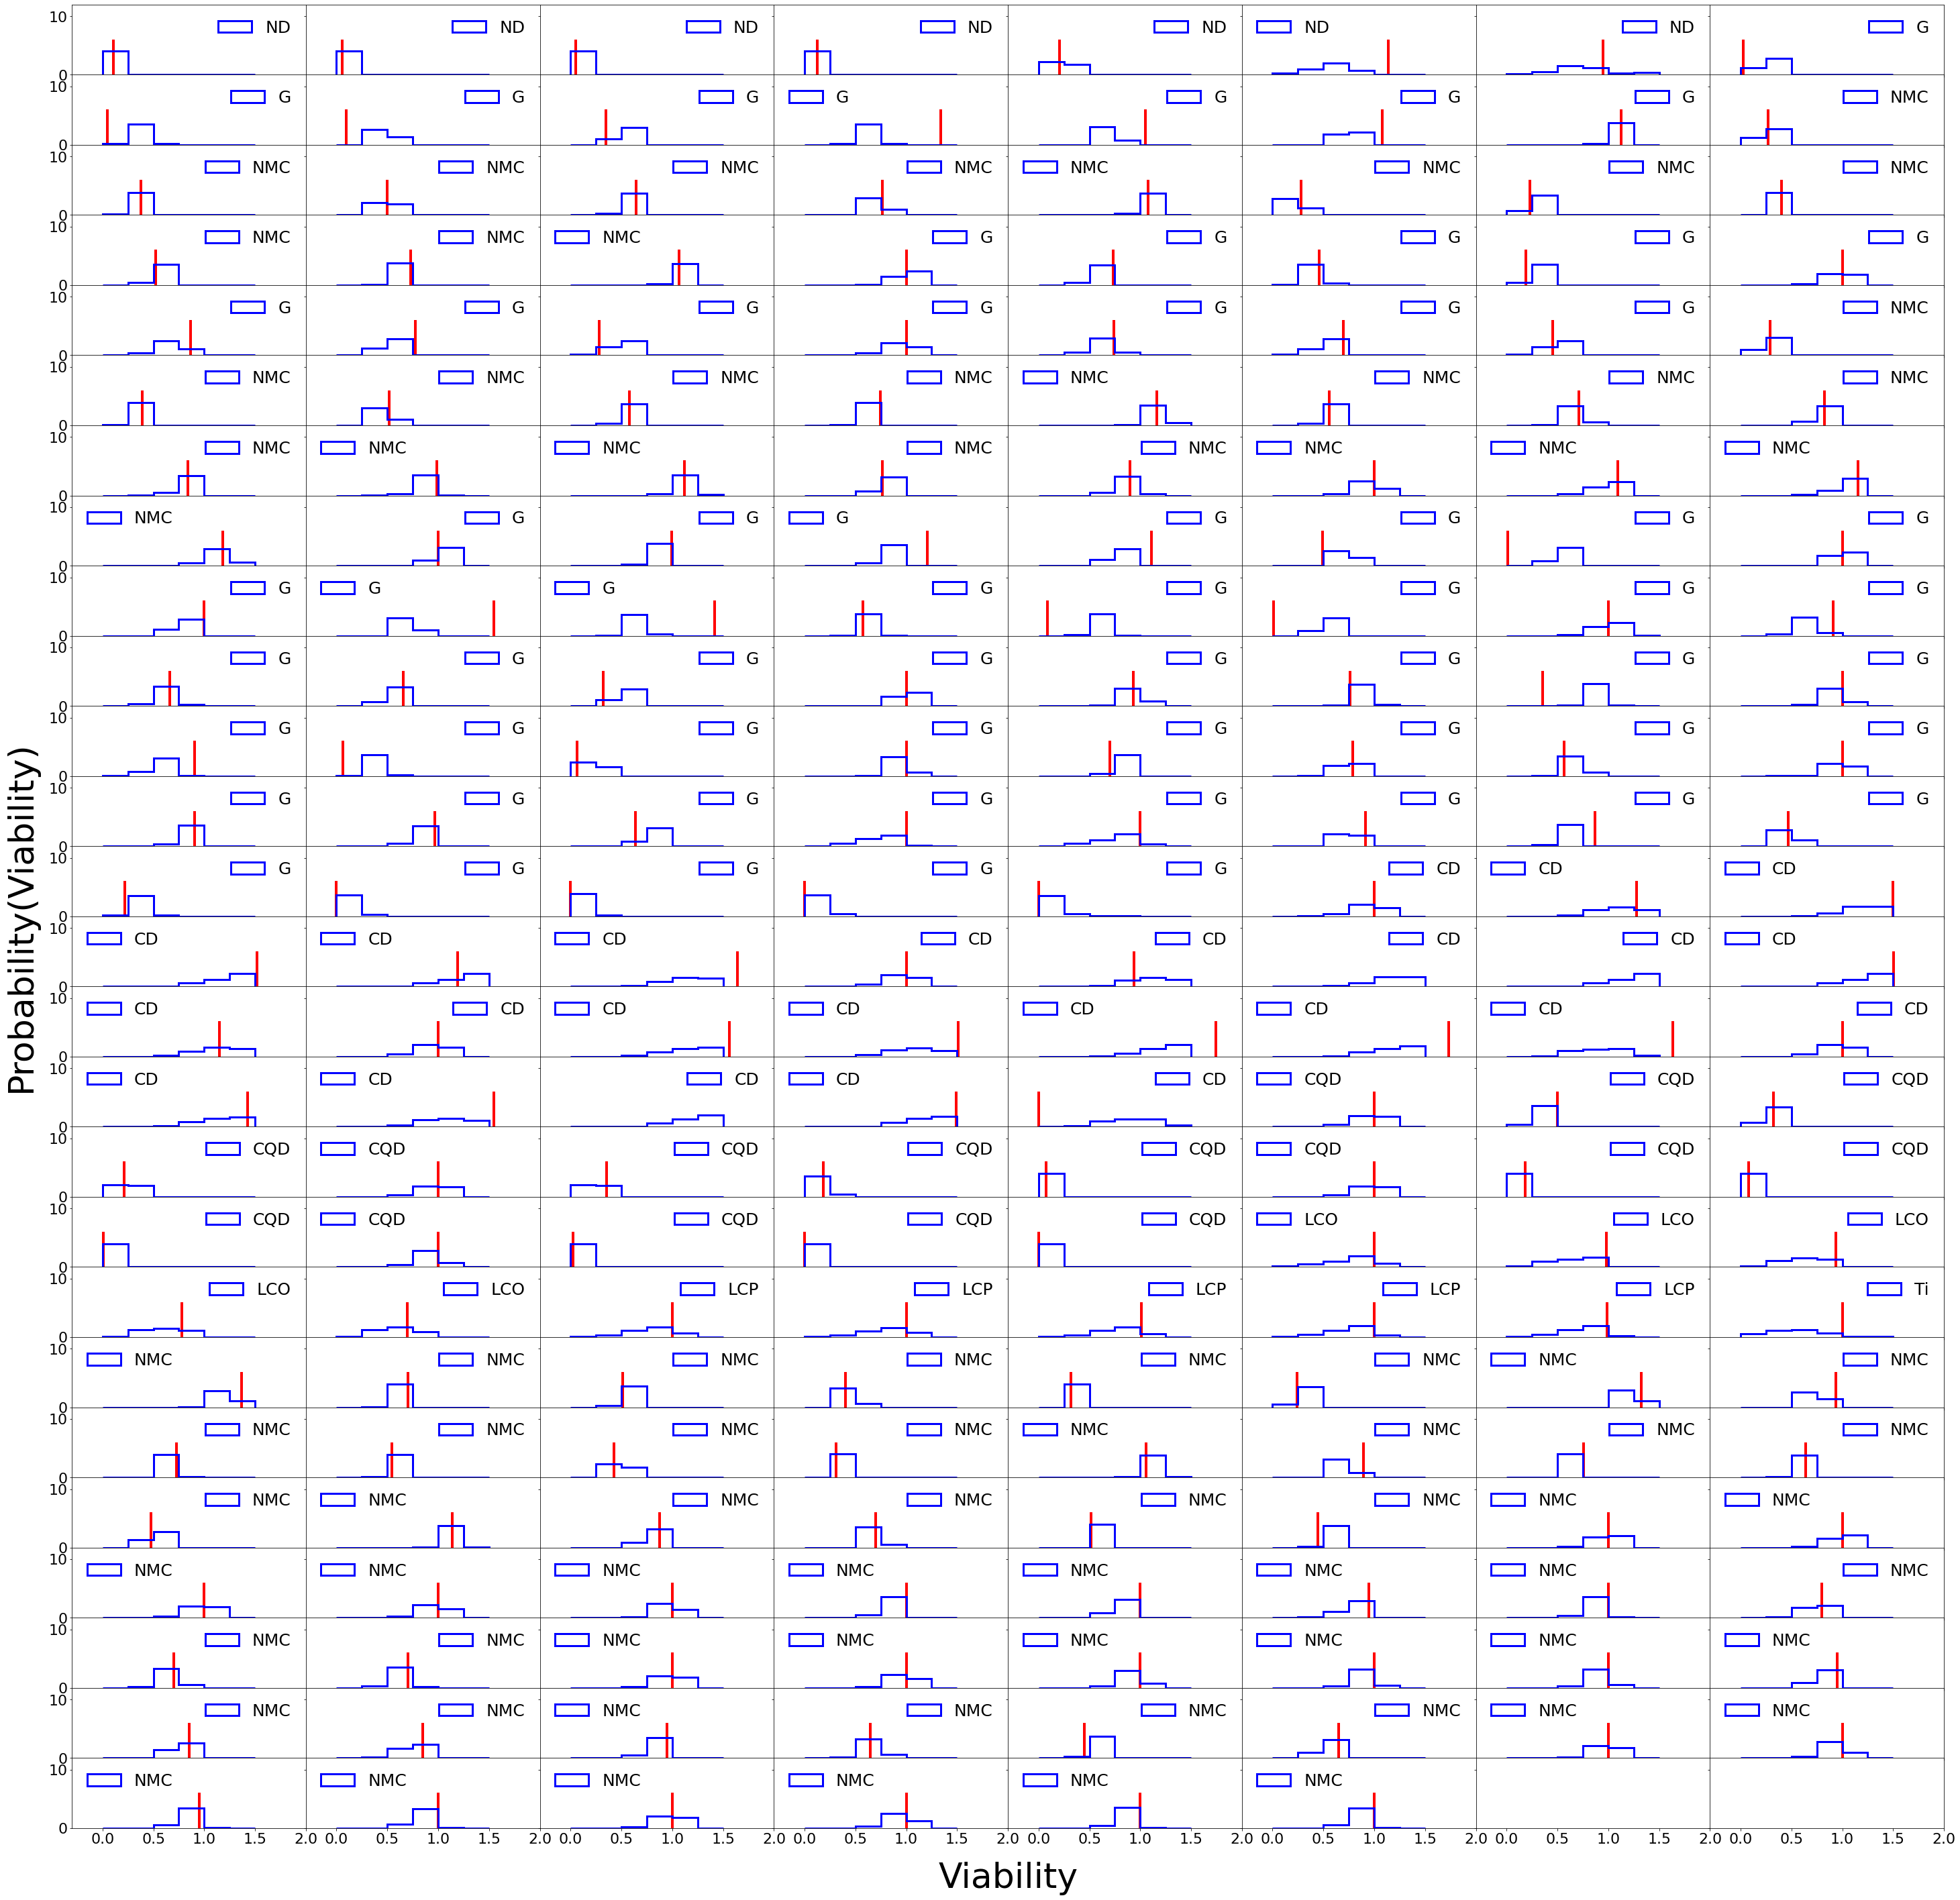

In [42]:
import matplotlib 
matplotlib.rc('xtick', labelsize=22) 
matplotlib.rc('ytick', labelsize=22) 

fig_new_dat, axes = plt.subplots(26, 8, figsize=(50, 50), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)



fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 100 7-fold bags for 206 data set - trial in MARCC',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=52, labelpad=50)
plt.xlabel('Viability', fontsize=52, labelpad=50)
plt.yticks([])
plt.xticks([])

for i in np.arange(206):
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    
    #print('test number:', i+1)
  
    M =np.mean(out4[:, 1, 0, i])
    Diff = abs(M-x2)
    print (Diff)
    
    #A = st.ttest_1samp(out3[:, 0, 0, i], x2)
    
    #print (A)
    
    #n, bins, patches = plt.hist(out[:, 0, 0, i], bins=20, range=(0, 1.5))
    
    #print(n)
    #print(bins)
    #print(patches)
    
    
    x2 = [i for i in CSN_new['Viability Fraction ']][i]
    #x2_err = [i for i in CSN_new_err][i]
    
    
    HH=['ND', 'ND', 'ND', 'ND', 'ND', 'ND', 'ND', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 
        'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD','CD', 'CD', 'CD', 'CD', 'CD', 'CD', 
        'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CQD', 'CQD', 'CQD', 'CQD','CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'CQD', 'LCO', 'LCO', 'LCO', 'LCO', 'LCO', 'LCP', 'LCP', 'LCP', 'LCP', 'LCP', 'Ti', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 
        'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC', 'NMC']
    
  
    axes[i].set_ylim([0, 12])
    axes[i].set_xlim([-0.3, 2.0])
    axes[i].hist(out4[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=HH[i], lw=3)
    
    axes[i].plot(np.ones(30)*x2, np.arange(0, 6, 0.2), 'r-', lw=4, zorder=0)
    #axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    #axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    
    
    axes[i].legend(framealpha=0.0,fontsize=25)
#plt.show()
plt.savefig('206_MARCC_100_k=4_ELUReLU.pdf', transparent=True, format='pdf', bbox_inches='tight')